In [974]:
# import important modules
import numpy as np
import pandas as pd

# sklearn modules
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB # classifier 

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    plot_confusion_matrix,
)
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# text preprocessing modules
from string import punctuation 

# text preprocessing modules
from nltk.tokenize import word_tokenize

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
import re #regular expression

import warnings
warnings.filterwarnings("ignore")
# seeding
np.random.seed(123)
from sklearn.decomposition import NMF


[nltk_data] Downloading package brown to
[nltk_data]     /Users/snizhanakurylyuk/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package names to
[nltk_data]     /Users/snizhanakurylyuk/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/snizhanakurylyuk/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/snizhanakurylyuk/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     /Users/snizhanakurylyuk/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


In [975]:
df = pd.read_csv('SPAM text message 20170820 - Data.csv', encoding="latin-1")

In [976]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã¼ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [978]:
df.Category.value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [979]:
df = df.drop_duplicates()
df = df.reset_index(inplace = False)[['Category','Message']]
print(df.shape)


(5157, 2)


In [980]:
df['labels'] = df['Category'].map({'ham':0, 'spam':1})
df

,Category,Message,labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5152,spam,This is the 2nd time we have tried 2 contact u...,1
5153,ham,Will Ã¼ b going to esplanade fr home?,0
5154,ham,"Pity, * was in mood for that. So...any other s...",0
5155,ham,The guy did some bitching but I acted like i'd...,0


In [981]:
spam_messages= df.loc[df.Category=="spam"]["Message"]
not_spam_messages= df.loc[df.Category=="ham"]["Message"]

print("spam count: " +str(len(df.loc[df.Category=="spam"])))
print("not spam count: " +str(len(df.loc[df.Category=="ham"])))

not_spam_messages

spam count: 641
not spam count: 4516


0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
6       Even my brother is not like to speak with me. ...
                              ...                        
5150                                         Huh y lei...
5153                Will Ã¼ b going to esplanade fr home?
5154    Pity, * was in mood for that. So...any other s...
5155    The guy did some bitching but I acted like i'd...
5156                           Rofl. Its true to its name
Name: Message, Length: 4516, dtype: object

In [1053]:
spam_messages

2       Free entry in 2 a wkly comp to win FA Cup fina...
5       FreeMsg Hey there darling it's been 3 week's n...
8       WINNER!! As a valued network customer you have...
9       Had your mobile 11 months or more? U R entitle...
11      SIX chances to win CASH! From 100 to 20,000 po...
                              ...                        
5125    Want explicit SEX in 30 secs? Ring 02073162414...
5127    ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5134    Had your contract mobile 11 Mnths? Latest Moto...
5151    REMINDER FROM O2: To get 2.50 pounds free call...
5152    This is the 2nd time we have tried 2 contact u...
Name: Message, Length: 641, dtype: object

In [1067]:
spam_messages_df = pd.DataFrame(spam_messages)
spam_messages_df

,Message
2,Free entry in 2 a wkly comp to win FA Cup fina...
5,FreeMsg Hey there darling it's been 3 week's n...
8,WINNER!! As a valued network customer you have...
9,Had your mobile 11 months or more? U R entitle...
11,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...
5125,Want explicit SEX in 30 secs? Ring 02073162414...
5127,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5134,Had your contract mobile 11 Mnths? Latest Moto...
5151,REMINDER FROM O2: To get 2.50 pounds free call...


In [1073]:
spam_messages_df['character_Count'] = df['Message'].str.len()
spam_messages_df.sort_values(by='character_Count', inplace = True)

In [1095]:
spam_messages_df.head(50)

,Message,character_Count
496,#ERROR!,7
3519,2/2 146tf150p,13
3737,ringtoneking 84484,18
2575,FROM 88066 LOST Â£12 HELP,25
1999,85233 FREE>Ringtone!Reply REAL,30
1717,Call FREEPHONE 0800 542 0578 now!,33
2669,FreeMsg>FAV XMAS TONES!Reply REAL,33
2176,88066 FROM 88066 LOST 3POUND HELP,33
699,08714712388 between 10am-7pm Cost 10p,37
3119,RCT' THNQ Adrian for U text. Rgds Vatian,40


In [1097]:
spam_messages_df[spam_messages_df["Message"].str.contains('free')].head(20)

,Message,character_Count
1234,network operator. The service is free. For T &...,66
1571,500 free text msgs. Just text ok to 80488 and ...,71
1892,it to 80488. Your 500 free text messages are v...,74
4693,Jamster! To get your free wallpaper text HEART...,109
3712,Refused a loan? Secured or Unsecured? Can't ge...,114
1632,Free Top ringtone -sub to weekly ringtone-get ...,114
3588,74355 XMAS iscoming & ur awarded either Â£500 ...,120
266,Ringtone Club: Get the UK singles chart on you...,133
1898,You have won a guaranteed Â£200 award or even ...,133
2847,This message is free. Welcome to the new & imp...,134


In [1100]:
df.loc[3247
      ].Message

"Get a FREE mobile video player FREE movie. To collect text GO to 89105. Its free! Extra films can be ordered t's and c's apply. 18 yrs only"

In [1060]:
df.loc[93].Message
#df.loc[8].Clean_Message_2


'Please call our customer service representative on 0800 169 6031 between 10am-9pm as you have WON a guaranteed Â£1000 cash or Â£5000 prize!'

# Text Preprocessing 

In [984]:
def preprocessing_text(texts):
    df["Clean_Message"] = df["Message"].str.lower() #puts everything in lowercase
    df["Clean_Message"] = df["Message"].replace(r'http\S+', '', regex=True) # removing any links 
    df["Clean_Message"] = df["Message"].replace(r'www.[^ ]+', '', regex=True)
    df["Clean_Message"] = df["Message"].replace(r'[0-9]+', " ", regex = True) #removing numbers
    df["Clean_Message"] = df["Message"].replace (r'[!"#$%&()*+,-./:;<=>?@[\]^_`{|}~]', '', regex=True) #remove special characters and puntuation marks 
    df["Clean_Message"] = df["Message"].replace(r"[^A-Za-z]", " ", regex = True) #replace any item that is not a letter
    

    return texts

In [985]:
texts = preprocessing_text(df)
texts


,Category,Message,labels,Clean_Message
0,ham,"Go until jurong point, crazy.. Available only ...",0,Go until jurong point crazy Available only ...
1,ham,Ok lar... Joking wif u oni...,0,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,Free entry in a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,0,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,Nah I don t think he goes to usf he lives aro...
...,...,...,...,...
5152,spam,This is the 2nd time we have tried 2 contact u...,1,This is the nd time we have tried contact u...
5153,ham,Will Ã¼ b going to esplanade fr home?,0,Will b going to esplanade fr home
5154,ham,"Pity, * was in mood for that. So...any other s...",0,Pity was in mood for that So any other s...
5155,ham,The guy did some bitching but I acted like i'd...,0,The guy did some bitching but I acted like i d...


In [987]:
stop_words =  stopwords.words('english')

def text_cleaning(text, remove_stop_words=True, lemmatize_words=True):
    # Clean the text, with the option to remove stop_words and to lemmatize word

    # Clean the text
    text = re.sub(r"[^A-Za-z0-9]", " ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r'\b\d+(?:\.\d+)?\s+', '', text) # remove numbers
    text = text.lower()
    
        
    #Remove punctuation from text
    text = ''.join([c for c in text if c not in punctuation])
    
    # Optionally, remove stop words
    if remove_stop_words:
        text = text.split()
        text = [w for w in text if not w in stop_words]
        text = " ".join(text)
    
    # Optionally, shorten words to their stems
    if lemmatize_words:
        text = text.split()
        lemmatizer = WordNetLemmatizer() 
        lemmatized_words = [lemmatizer.lemmatize(word) for word in text]
        text = " ".join(lemmatized_words)
    
    # Return a list of words
    return(text)

In [988]:
#clean the review
df["Clean_Message_2"]= df["Message"].apply(text_cleaning)

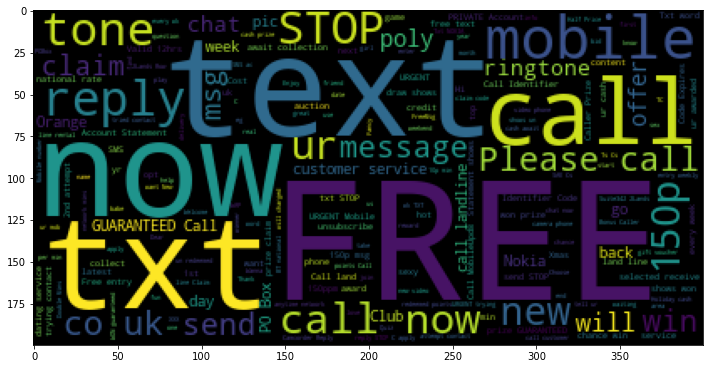

In [990]:
spam_list = df[df["Category"] == "spam"]["Message"].unique().tolist()
spam = " ".join(spam_list)
spam_wordcloud = WordCloud().generate(spam)
plt.figure(figsize=(12,8))
plt.imshow(spam_wordcloud)
plt.show()

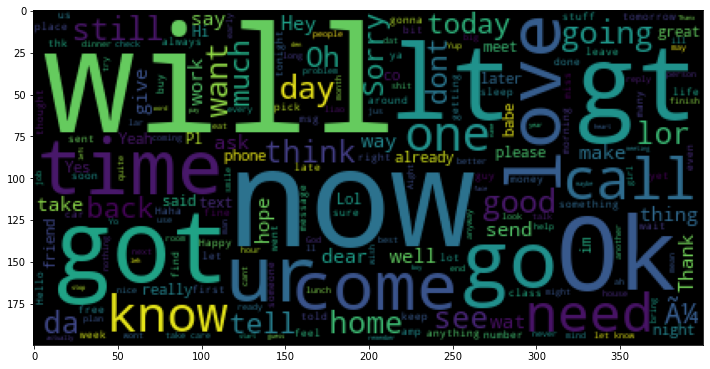

In [991]:
ham_list = df[df["Category"] == "ham"]["Message"].unique().tolist()
ham = " ".join(ham_list)
ham_wordcloud = WordCloud().generate(ham)
plt.figure(figsize=(12,8))
plt.imshow(ham_wordcloud)
plt.show()

# Modeling - TFIDF Vectorization


In [996]:
#TFIDF 

docs = df.Clean_Message_2
tfidf= TfidfVectorizer(stop_words= "english",
                       max_df = .4, 
                       min_df = 5, #maybe 5 or 6
                       max_features = 20000,
                       lowercase=True, 
                       analyzer='word',
                       ngram_range=(1,3),
                       dtype=np.float32)
doc_term_matrix = tfidf.fit_transform(docs) #should this be values?

#

In [997]:
doc_term_matrix = pd.DataFrame(doc_term_matrix.toarray(), columns = tfidf.get_feature_names())
doc_term_matrix.head()

,04,10am,10p,10p min,10p minute,10p minute bt,11mths,12hrs,12hrs 150ppm,150p,...,yesterday,yijue,ym,yo,yoga,yogasana,yr,yun,yup,zed
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [998]:
doc_term_matrix.shape

(5157, 1871)

In [999]:
doc_term_matrix

,04,10am,10p,10p min,10p minute,10p minute bt,11mths,12hrs,12hrs 150ppm,150p,...,yesterday,yijue,ym,yo,yoga,yogasana,yr,yun,yup,zed
0,0.0,0.0,0.000000,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5152,0.0,0.0,0.179785,0.0,0.21596,0.21596,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5153,0.0,0.0,0.000000,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5154,0.0,0.0,0.000000,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5155,0.0,0.0,0.000000,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1000]:
docs

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry wkly comp win fa cup final tkts 21s...
3                     u dun say early hor u c already say
4                     nah think go usf life around though
                              ...                        
5152    2nd time tried contact u u pound prize claim e...
5153                            b going esplanade fr home
5154                                 pity mood suggestion
5155    guy bitching acted like interested buying some...
5156                                       rofl true name
Name: Clean_Message_2, Length: 5157, dtype: object

In [1001]:
vocabulary = tfidf.get_feature_names()
vocabulary

['04',
 '10am',
 '10p',
 '10p min',
 '10p minute',
 '10p minute bt',
 '11mths',
 '12hrs',
 '12hrs 150ppm',
 '150p',
 '150p msg',
 '150p msg cc',
 '150ppm',
 '16',
 '1st',
 '1st week',
 '20p',
 '20p min',
 '20p min ntt',
 '25p',
 '2day',
 '2lands',
 '2lands row',
 '2lands row w1j6hl',
 '2mrw',
 '2nd',
 '2nd attempt',
 '2nd attempt contact',
 '2nd attempt reach',
 '2nd time',
 '2nd time tried',
 '2nite',
 '2optout',
 '3510i',
 '3510i colour',
 '3510i colour phone',
 '3g',
 '40gb',
 '40gb ipod',
 '4u',
 '50',
 '50p',
 '5wb',
 '62468',
 '7pm',
 '7pm cost',
 '7pm cost 10p',
 '8th',
 'abiola',
 'able',
 'abt',
 'ac',
 'acc',
 'access',
 'account',
 'account statement',
 'account statement redeemed',
 'activate',
 'actually',
 'ad',
 'add',
 'added',
 'address',
 'admirer',
 'admirer looking',
 'admirer looking make',
 'adult',
 'advance',
 'advice',
 'affair',
 'aft',
 'afternoon',
 'afternoon love',
 'aftr',
 'age',
 'age16',
 'ago',
 'ah',
 'aha',
 'ahead',
 'ahmad',
 'aight',
 'air',
 'ai

# Topic Modeling - NMF

In [1002]:
nmf = NMF(n_components = 10)
topic_doc= nmf.fit_transform(doc_term_matrix)
topic_doc.shape 

(5157, 10)

In [1003]:
topic_doc[0] # topic representation for first text classifier fit topic doc y - classifier.fit(topic_doc, y)

array([0.        , 0.        , 0.        , 0.        , 0.00038754,
       0.08973336, 0.01627965, 0.        , 0.        , 0.02281636],
      dtype=float32)

In [1004]:
topic_matrix = nmf.components_
topic_matrix.shape

(10, 1871)

In [1005]:
word_topic_matrix_df = pd.DataFrame(nmf.components_ , columns = vocabulary).T.add_prefix('topic_')
word_topic_matrix_df

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
04,0.000006,0.000459,0.000000,0.000100,0.001612,0.000091,0.000000,0.000000,0.000000,0.000000
10am,0.000000,0.000000,0.000000,0.000000,0.006102,0.000000,0.001402,0.000000,0.000000,0.000000
10p,0.000602,0.000000,0.000000,0.000000,0.032320,0.000000,0.000000,0.000000,0.000000,0.004732
10p min,0.001114,0.000000,0.000000,0.000000,0.024833,0.000000,0.000000,0.000000,0.000000,0.001765
10p minute,0.000000,0.000000,0.000000,0.000000,0.002419,0.000000,0.003568,0.000000,0.000000,0.003967
...,...,...,...,...,...,...,...,...,...,...
yogasana,0.000000,0.000846,0.000989,0.000292,0.000046,0.003480,0.000388,0.000561,0.006064,0.000828
yr,0.020321,0.000000,0.006932,0.000000,0.031415,0.000000,0.000302,0.010528,0.002866,0.000000
yun,0.000000,0.000000,0.000000,0.000000,0.000000,0.017540,0.003587,0.000000,0.000000,0.000000
yup,0.000000,0.000000,0.078807,0.003544,0.021966,0.002829,0.000000,0.000000,0.066311,0.001953


In [1015]:
word_topic_matrix_df.sort_values(by = ['topic_2'], ascending=False).head(5)


,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
ok,0.000000,0.000000,2.281817,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
lor,0.000000,0.000000,0.293450,0.000000,0.000000,0.041935,0.000000,0.047560,0.500571,0.018824
ok lor,0.000000,0.000000,0.216323,0.000000,0.000000,0.000000,0.000000,0.000000,0.051479,0.001395
thanx,0.000000,0.000000,0.130745,0.000000,0.000640,0.012780,0.019807,0.000000,0.007561,0.004247
said,0.015637,0.069835,0.102797,0.004608,0.014199,0.011496,0.036709,0.031017,0.004341,0.045074


# Topic Modeling Version 1

In [1101]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        
display_topics(nmf, tfidf.get_feature_names(), 10)


Topic  0
gt, lt, lt gt, gt min, lt gt min, min, like lt gt, like lt, gt lt, lt gt lt

Topic  1
know, let, dont, let know, want, need, dont know, sure, pls, guy

Topic  2
ok, lor, ok lor, thanx, said, ask, leave, yup, ya, ur

Topic  3
come, want, home, want come, tomorrow, come home, come tomorrow, pick, tell, online

Topic  4
free, ur, text, send, stop, txt, reply, message, phone, mobile

Topic  5
got, da, sorry, yeah, wat, later, say, oh, work, hey

Topic  6
good, day, love, hope, great, morning, happy, dear, night, babe

Topic  7
like, tell, dont, feel, think, like lt gt, like lt, feel like, lol, yeah

Topic  8
going, home, lor, way, dinner, going home, work, lunch, sleep, today

Topic  9
time, wat, want, wat time, tell, make, week, long, soon, im


# Topic Modeling Verison 2

In [1025]:
topics_df= pd.DataFrame([display_topics(nmf, tfidf.get_feature_names(), 10)])


Topic  0
gt, lt, lt gt, gt min, lt gt min, min, like lt gt, like lt, gt lt, lt gt lt

Topic  1
know, let, dont, let know, want, need, dont know, sure, pls, guy

Topic  2
ok, lor, ok lor, thanx, said, ask, leave, yup, ya, ur

Topic  3
come, want, home, want come, tomorrow, come home, come tomorrow, pick, tell, online

Topic  4
free, ur, text, send, stop, txt, reply, message, phone, mobile

Topic  5
got, da, sorry, yeah, wat, later, say, oh, work, hey

Topic  6
good, day, love, hope, great, morning, happy, dear, night, babe

Topic  7
like, tell, dont, feel, think, like lt gt, like lt, feel like, lol, yeah

Topic  8
going, home, lor, way, dinner, going home, work, lunch, sleep, today

Topic  9
time, wat, want, wat time, tell, make, week, long, soon, im


In [1028]:
sub ='like it gt'
 
# start var
start = 2
 
# creating and passing series to new column
df["Clean_Message_2"].str.find(sub, start)
 
df[df["Clean_Message_2"].str.contains('like it gt')]

,Category,Message,labels,Clean_Message,Clean_Message_2


In [1046]:
df[df["Clean_Message_2"].str.contains('gt')].tail(20)

,Category,Message,labels,Clean_Message,Clean_Message_2
4896,ham,"Vikky, come around &lt;TIME&gt; ..",0,Vikky come around lt TIME gt,vikky come around lt time gt
4915,ham,About &lt;#&gt; bucks. The banks fees are fix...,0,About lt gt bucks The banks fees are fix...,lt gt buck bank fee fixed better call bank find
4917,ham,Pls ask macho how much is budget for bb bold 2...,0,Pls ask macho how much is budget for bb bold ...,pls ask macho much budget bb bold co saw new o...
4946,ham,No. It's not pride. I'm almost &lt;#&gt; yea...,0,No It s not pride I m almost lt gt yea...,pride almost lt gt year old takin money kid su...
4948,ham,My birthday is on feb &lt;#&gt; da. .,0,My birthday is on feb lt gt da,birthday feb lt gt da
4968,ham,This is ur face test ( 1 2 3 4 5 6 7 8 9 &lt;...,0,This is ur face test lt ...,ur face test lt gt select number tell ur face ...
4976,ham,Hi mom we might be back later than &lt;#&gt;,0,Hi mom we might be back later than lt gt,hi mom might back later lt gt
4987,ham,"I can make it up there, squeezed &lt;#&gt; b...",0,I can make it up there squeezed lt gt b...,make squeezed lt gt buck dad
4990,ham,How do friends help us in problems? They give ...,0,How do friends help us in problems They give ...,friend help u problem give stupid suggestion l...
4991,ham,I will be gentle baby! Soon you will be taking...,0,I will be gentle baby Soon you will be taking...,gentle baby soon taking lt gt inch deep inside...


In [1102]:
df.loc[55].Message
df.loc[55].Clean_Message_2


'know mallika sherawat yesterday find lt url gt'

# Topic Modeling Verison 3

In [646]:
docs_2 = df.Clean_Message
tfidf2= TfidfVectorizer(stop_words= "english",
                       max_df = .6, 
                       min_df = 5, #maybe 5 or 6
                       max_features = 20000,
                       lowercase=True, 
                       analyzer='word',
                       ngram_range=(1,3),
                       dtype=np.float32)
doc_term_matrix2 = tfidf2.fit_transform(docs_2) #should this be values?


In [1103]:
display_topics(nmf, tfidf2.get_feature_names(), 10)


Topic  0
gud, looking make, looks like, guide, lot, married, lift, life, gud nyt, lost

Topic  1
kiss, leaving, dun haf, lect, txting, mom, dun wan, somethin, opinion, handset

Topic  2
new video phone, locations, new years, std, reading, believe, lazy, wats, wan, time tried contact

Topic  3
credit, txting, horrible, txts, swt, credits, croydon cr, oh, spend, nights

Topic  4
future, time tried contact, standard rates, replying, sick, thats, princess, makes, offer new, messages

Topic  5
gt lt, die, selected receive award, want come, understand, landline complimentary, receive, new, ve sent, hit

Topic  6
got job, discuss, lol, hot, guaranteed, miss, heard, does, mp player, box croydon

Topic  7
lets, spend, dun haf, forward, stop send, lift, life, forwarded, ll going, want come

Topic  8
goodmorning, horrible, locations, update, draw gift voucher, goodmorning today, ve sent, lovely, save, support

Topic  9
sub, understand, txting, unless, spend, loyalty, ur friends, ll leave, select

# Topic Modeling Version 4

In [648]:
docs_2 = df.Clean_Message
tfidf2= TfidfVectorizer(stop_words= "english",
                        max_df = .75, 
                       min_df = 5, #maybe 5 or 6
                       max_features = 2000,
                       lowercase=True, 
                       analyzer="word", #changed
                       ngram_range=(1,3))
doc_term_matrix2 = tfidf2.fit_transform(docs_2) #should this be values?


In [1104]:
display_topics(nmf, tfidf2.get_feature_names(), 10)


Topic  0
gud, looking make, looks like, guide, lot, married, lift, life, gud nyt, lost

Topic  1
kiss, leaving, dun haf, lect, txting, mom, dun wan, somethin, opinion, handset

Topic  2
new video phone, locations, new years, std, reading, believe, lazy, wats, wan, time tried contact

Topic  3
credit, txting, horrible, txts, swt, credits, croydon cr, oh, spend, nights

Topic  4
future, time tried contact, standard rates, replying, sick, thats, princess, makes, offer new, messages

Topic  5
gt lt, die, selected receive award, want come, understand, landline complimentary, receive, new, ve sent, hit

Topic  6
got job, discuss, lol, hot, guaranteed, miss, heard, does, mp player, box croydon

Topic  7
lets, spend, dun haf, forward, stop send, lift, life, forwarded, ll going, want come

Topic  8
goodmorning, horrible, locations, update, draw gift voucher, goodmorning today, ve sent, lovely, save, support

Topic  9
sub, understand, txting, unless, spend, loyalty, ur friends, ll leave, select

# Split Data in to Test Train

In [654]:
X= df['Clean_Message_2']
y= df['labels']

In [656]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=42, shuffle = True, stratify = y)

In [657]:
X_train_vect = tfidf.fit_transform(X_train)
X_test_vect = tfidf.transform(X_test)


In [658]:
X_train_vect.shape

(4383, 1545)

In [659]:
X_test_vect.shape

(774, 1545)

In [660]:
print(X_train_vect.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# Classification Algorithmns

In [661]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000, criterion = "entropy", random_state = 0)
rf.fit(X_train_vect, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=0)

In [662]:
y_pred = rf.predict(X_test_vect)

In [663]:
from sklearn.metrics import log_loss,confusion_matrix,classification_report,roc_curve,auc
print("\nConfusion Matrix\n",confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


Confusion Matrix
 [[675   3]
 [ 16  80]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       678
           1       0.96      0.83      0.89        96

    accuracy                           0.98       774
   macro avg       0.97      0.91      0.94       774
weighted avg       0.98      0.98      0.97       774



In [688]:
features_train, features_test, labels_train, labels_test = train_test_split(features, df['Category'], test_size=0.3, random_state=111)

In [689]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [674]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier(n_neighbors=49)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=111)
abc = AdaBoostClassifier(n_estimators=62, random_state=111)
bc = BaggingClassifier(n_estimators=9, random_state=111)
etc = ExtraTreesClassifier(n_estimators=9, random_state=111)

In [765]:
clfs = {'SVC' : svc,'KNeighbors' : knc, 'MultinomialNB': mnb, 'DecisionTree': dtc, 'Logistic Regression': lrc, 'Random Forest': rfc, 'AdaBoost': abc, 'Bagging': bc, 'Extra Trees': etc}


In [766]:
def train_classifier(clf, feature_train, labels_train):    
    clf.fit(feature_train, labels_train)

In [768]:
features = tfidf.fit_transform(df['Message'])

In [769]:
def predict_labels(clf, features):
    return (clf.predict(features))

In [770]:
pred_scores = []
for k,v in clfs.items():
    train_classifier(v, features_train, labels_train)
    pred = predict_labels(v,features_test)
    pred_scores.append((k, accuracy_score(labels_test,pred)))
pred_scores

[('SVC', 0.9786821705426356),
 ('KNeighbors', 0.8733850129198967),
 ('MultinomialNB', 0.977390180878553),
 ('DecisionTree', 0.9560723514211886),
 ('Logistic Regression', 0.9476744186046512),
 ('Random Forest', 0.9722222222222222),
 ('AdaBoost', 0.9677002583979328),
 ('Bagging', 0.9612403100775194),
 ('Extra Trees', 0.9709302325581395)]

In [771]:
df_class = pd.DataFrame(pred_scores, columns=["Classifier", "Accuracy_Score"])
df_class = df_class.sort_values(by="Accuracy_Score", ascending= True)
df_class

,Classifier,Accuracy_Score
1,KNeighbors,0.873385
4,Logistic Regression,0.947674
3,DecisionTree,0.956072
7,Bagging,0.961240
6,AdaBoost,0.967700
8,Extra Trees,0.970930
5,Random Forest,0.972222
2,MultinomialNB,0.977390
0,SVC,0.978682


([<matplotlib.axis.XTick at 0x7fe9277c13d0>,
 [Text(0, 0, 'KNeighbors'),
  Text(1, 0, 'Logistic Regression'),
  Text(2, 0, 'DecisionTree'),
  Text(3, 0, 'Bagging'),
  Text(4, 0, 'AdaBoost'),
  Text(5, 0, 'Extra Trees'),
  Text(6, 0, 'Random Forest'),
  Text(7, 0, 'MultinomialNB'),
  Text(8, 0, 'SVC')])

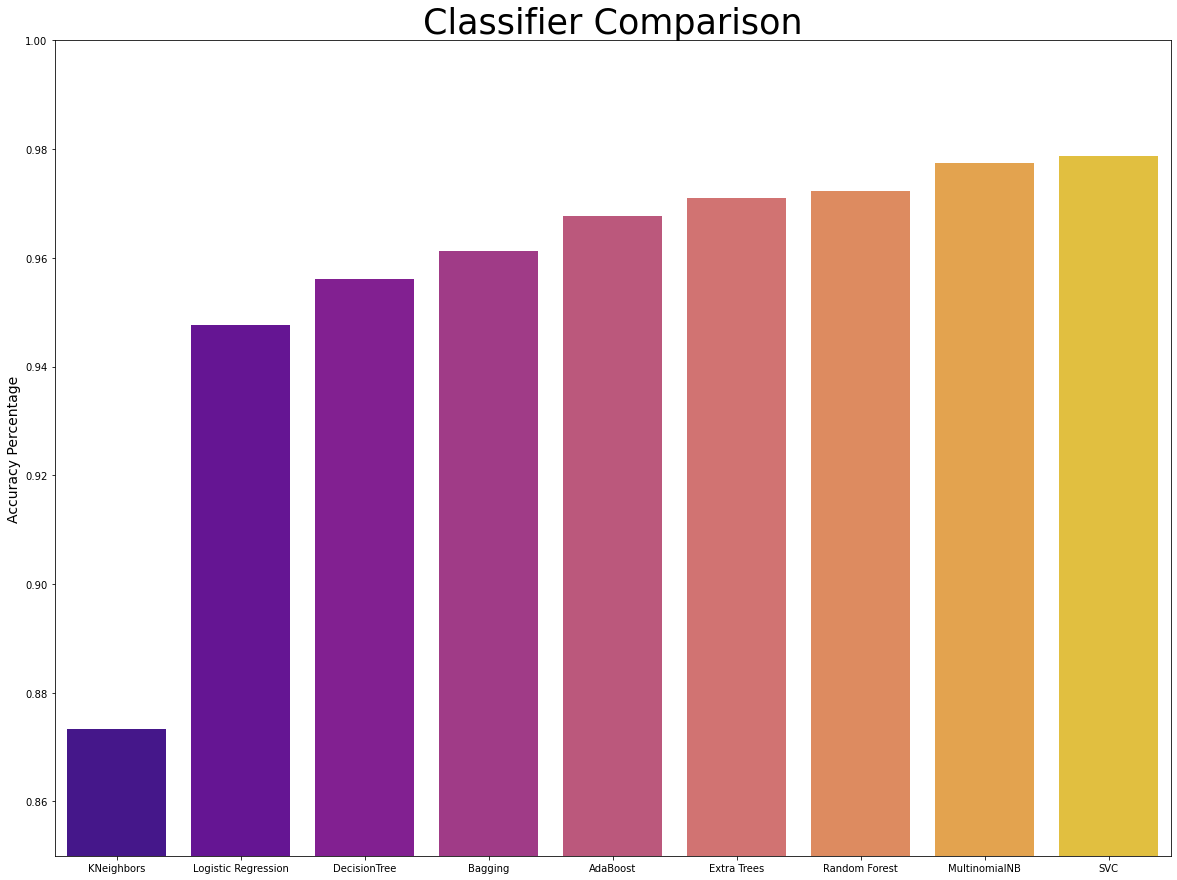

In [807]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.axis import Axis
import seaborn as sns

# create dataset
height = df_class["Accuracy_Score"]
bars = df_class["Classifier"]
x_pos = np.arange(len(height))
 
fig,ax = plt.subplots(figsize=(20,15))
sns.barplot(x_pos, height, ci=95,ax=ax, palette = "plasma")


#plt.xlim(8, 8)
plt.ylim(.85, 1.00)

plt.title('Classifier Comparison', fontsize=35)
#plt.xlabel('Classifier', fontsize=14)
plt.ylabel('Accuracy Percentage', fontsize=14)
 
# Create names on the x axis
plt.xticks(x_pos, bars)
 
# Show graph

In [809]:
svc = SVC(kernel='sigmoid', gamma=1.0)
svc.fit(X_train_vect, y_train)

SVC(gamma=1.0, kernel='sigmoid')

In [811]:
y_pred = svc.predict(X_test_vect)

In [813]:
from sklearn.metrics import log_loss,confusion_matrix,classification_report,roc_curve,auc
print("\nConfusion Matrix\n",confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


Confusion Matrix
 [[674   4]
 [ 13  83]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       678
           1       0.95      0.86      0.91        96

    accuracy                           0.98       774
   macro avg       0.97      0.93      0.95       774
weighted avg       0.98      0.98      0.98       774



<AxesSubplot:>

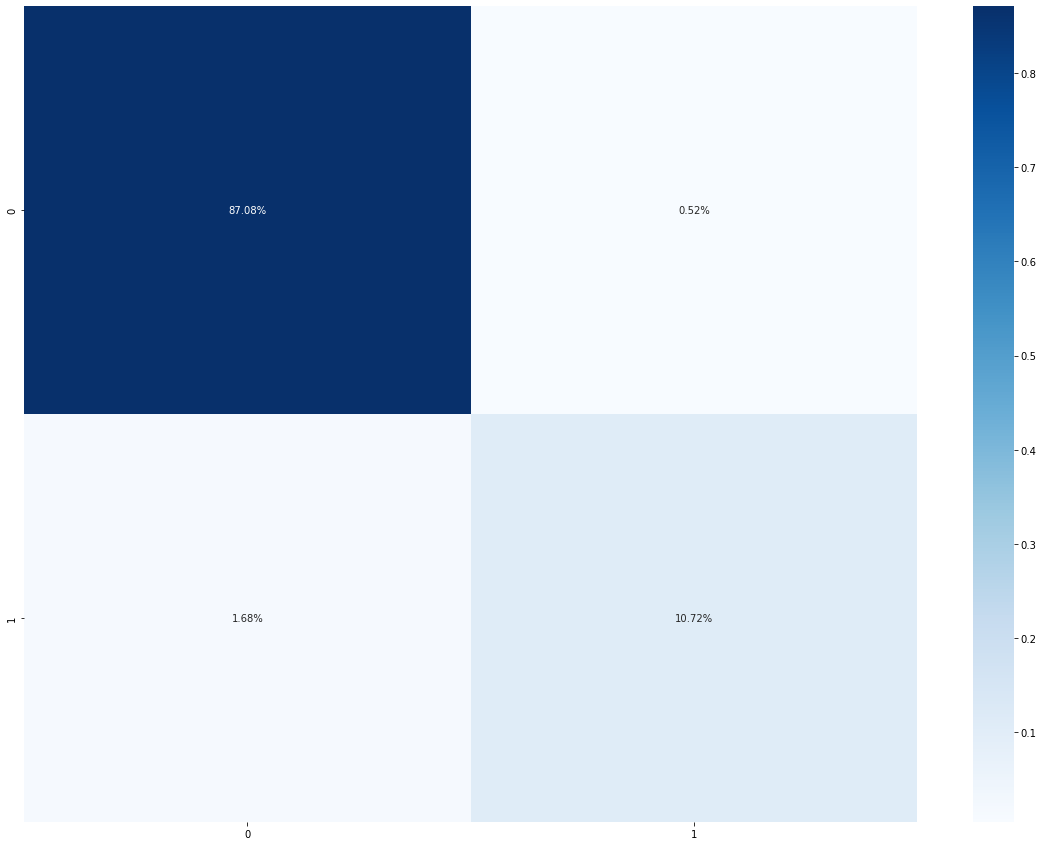

In [851]:
import seaborn as sns
cf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')


In [860]:
from sklearn.model_selection import RandomizedSearchCV

#Number of Trees in random forest
n_estimators= [int(x) for x in np.linspace(start =200, stop = 2000, num = 10)]

#Number of features to consider at every split 
max_features = ["auto", "sqrt"]

#Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10,110, num=11)]
max_depth.append(None)

#minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

#minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

#Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


# Random Forest Hyperparamter Tuning 

In [865]:

rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid,
                              n_iter = 10,
                              cv=3,
                              verbose =2,
                              random_state =42,
                              n_jobs = -1)

#Fit the random search model
rf_random.fit(features_train, labels_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_estimators=31,
                                                    random_state=111),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [919]:
rf_random.best_params_


{'n_estimators': 1000,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 80,
 'bootstrap': False}

In [873]:
rf=  RandomForestClassifier(n_estimators=1000, 
                                               min_samples_split= 10,
                                               min_samples_leaf=  1,
                                               max_features= "auto",
                                               max_depth = 80,
                                               bootstrap= False)
rf.fit(X_train_vect, y_train)
y_pred_rfc = rf.predict(X_test_vect)

In [875]:
print("confusion matrix: \n\n", 
      confusion_matrix(y_test, y_pred_rfc))

print(classification_report(y_test, y_pred_rfc))

confusion matrix: 

 [[672   6]
 [ 15  81]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       678
           1       0.93      0.84      0.89        96

    accuracy                           0.97       774
   macro avg       0.95      0.92      0.93       774
weighted avg       0.97      0.97      0.97       774



# MultinomialNB Hyperparameter Tuning 

In [942]:
mnb.get_params()

{'alpha': 0.2, 'class_prior': None, 'fit_prior': True}

In [951]:
mnb_param_grid = {'alpha': [0.01, 1.0, 10.0, 50.0]}
mnb_grid = GridSearchCV(MultinomialNB(), param_grid=mnb_param_grid, scoring = 'neg_log_loss')

In [952]:
mnb_grid.fit(features_train, labels_train)

GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': [0.01, 1.0, 10.0, 50.0]},
             scoring='neg_log_loss')

In [928]:
mnb.get_params().keys()

dict_keys(['alpha', 'class_prior', 'fit_prior'])

In [955]:
mnb_grid.best_params_


{'alpha': 0.01}

In [958]:
mnb = MultinomialNB(alpha=0.01)
mnb.fit(features_train, labels_train)

MultinomialNB(alpha=0.01)

In [960]:
y_pred_mnb = mnb.predict(features_test)

In [961]:
print("confusion matrix: \n\n", 
      confusion_matrix(labels_test, y_pred_mnb))

print(classification_report(labels_test, y_pred_mnb))

confusion matrix: 

 [[1341   11]
 [  23  173]]
              precision    recall  f1-score   support

         ham       0.98      0.99      0.99      1352
        spam       0.94      0.88      0.91       196

    accuracy                           0.98      1548
   macro avg       0.96      0.94      0.95      1548
weighted avg       0.98      0.98      0.98      1548



# SVC Hyperparameter Tuning 


In [892]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.model_selection import learning_curve,GridSearchCV


In [895]:
param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}

SVC_grid = GridSearchCV(SVC(),param_grid,refit = True, verbose=2)


In [897]:
SVC_grid.fit(features_train, labels_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.2s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.2s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.2s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.2s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.2s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.4s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.4s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.4s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.4s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.4s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.2s
[CV] END ......................C=1, gamma=0.1, 

[CV] END ..................C=100, gamma=0.001, kernel=linear; total time=   0.2s
[CV] END ..................C=100, gamma=0.001, kernel=linear; total time=   0.2s
[CV] END ..................C=100, gamma=0.001, kernel=linear; total time=   0.1s
[CV] END ..................C=100, gamma=0.001, kernel=linear; total time=   0.2s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.2s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.2s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.3s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.3s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.2s
[CV] END .................C=100, gamma=0.0001, kernel=linear; total time=   0.1s
[CV] END .................C=100, gamma=0.0001, kernel=linear; total time=   0.2s
[CV] END .................C=100, gamma=0.0001, kernel=linear; total time=   0.2s
[CV] END .................C=

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             verbose=2)

In [900]:
SVC_grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [903]:
svc = SVC(C= 10, kernel='rbf', gamma=1)
svc.fit(features_train, labels_train)

SVC(C=10, gamma=1)

In [911]:
y_pred_svc = svc.predict(features_test)

In [964]:
print("confusion matrix: \n\n", 
      confusion_matrix(labels_test, y_pred_svc))

print(classification_report(labels_test, y_pred_svc))

confusion matrix: 

 [[1348    4]
 [  28  168]]
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1352
        spam       0.98      0.86      0.91       196

    accuracy                           0.98      1548
   macro avg       0.98      0.93      0.95      1548
weighted avg       0.98      0.98      0.98      1548



# Scatter Text

In [827]:
import scattertext as st
import spacy 
from pprint import pprint


In [829]:
scattertext_df =df[["Category", "Clean_Message_2"]]
scattertext_df

,Category,Clean_Message_2
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry wkly comp win fa cup final tkts 21s...
3,ham,u dun say early hor u c already say
4,ham,nah think go usf life around though
...,...,...
5152,spam,2nd time tried contact u u pound prize claim e...
5153,ham,b going esplanade fr home
5154,ham,pity mood suggestion
5155,ham,guy bitching acted like interested buying some...


In [832]:
#Scatter Text Corpus

nlp = spacy.load('en')
corpus = st.CorpusFromPandas(scattertext_df,
                            category_col ="Category",
                            text_col ="Clean_Message_2",
                            nlp=nlp).build()

In [833]:
print(list(corpus.get_scaled_f_scores_vs_background().index[:10]))

['chikku', 'boytoy', 'oredi', 'freemsg', 'frnd', 'lor', 'frnds', 'rakhesh', 'thk', 'savamob']


In [835]:
term_freq_df = corpus.get_term_freq_df()
term_freq_df['Spam Score'] = corpus.get_scaled_f_scores('spam')
pprint(list(term_freq_df.sort_values(by='Spam Score', ascending=False).index[:10]))

['claim',
 'tone',
 '150p',
 'guaranteed',
 'awarded',
 'co uk',
 'prize',
 'ringtone',
 '150ppm',
 '10p']


In [840]:
term_freq_df['Normal Text Score'] = corpus.get_scaled_f_scores("ham")
pprint(list(term_freq_df.sort_values(by='Normal Text Score', ascending=False).index[:10]))

['sure',
 'morning',
 'lt',
 'lor',
 'lt gt',
 'said',
 'anything',
 'later',
 'na',
 'gt']


In [850]:
html = st.produce_scattertext_explorer(corpus,
                                       category='spam',
                                       category_name='spam',
                                       #not_category_name='ham',
                                       width_in_pixels=1000)
                                       #metadata=scattertext_df['Clean_Message_2'])
open("Convention-Visualization.html", 'wb').write(html.encode('utf-8'))


960983

# Streamlit


In [971]:
from sklearn.neural_network import MLPClassifier
neural_net_pipeline = Pipeline([('vectorizer', tfidf), 
                                ('nn', MLPClassifier(hidden_layer_sizes=(700, 700)))])

In [972]:
neural_net_pipeline.fit(X_train, y_train)


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(dtype=<class 'numpy.float32'>, max_df=0.4,
                                 max_features=20000, min_df=5,
                                 ngram_range=(1, 3), stop_words='english')),
                ('nn', MLPClassifier(hidden_layer_sizes=(700, 700)))])

In [970]:
from joblib import dump
dump(neural_net_pipeline, 'spam_classifier.joblib')

['spam_classifier.joblib']